# OMNIBUS Bill 2024 118TH CONGRESS 2D SESSION	H. RES. ll

# Data Mining Process Alpha

# Step1: initail cleaning and inspection.

In [1]:
#-- Importing Nessesary libaries --#

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from docx import Document
from wordcloud import WordCloud

The data is in a microsoft word document of the 1050 page bill.

In [17]:
from docx import Document

def docx_to_dataframe(file_path):
    doc = Document(file_path)
    data = {'Text': []}
    for paragraph in doc.paragraphs:
        data['Text'].append(paragraph.text)
    df = pd.DataFrame(data)
    return df

file_path = '/Users/michaelsegaline/Desktop/OMNIBUS bill /Omnibus.docx'
df = docx_to_dataframe(file_path)
df.head()


,Text
0,
1,
2,U:\2024OMNI\HMS31169.xml
3,
4,SEN. APPRO.


In [4]:
df.shape

(10986, 1)

# The below code documents each function used to create a tabular dataset of workable variables sourced from a .docx file

In [5]:
#-- Function to extract capitalized words (agencies) from the text --#
def extract_agencies(Text):
    return re.findall(r'[A-Z][A-Z\s&]+', Text)

#-- Function to extract the Title associated with each agency in the bill --#
def extract_title(Text):
    match = re.search(r'TITLE [IVXLC]+\s+', Text)
    if match:
        return match.group(0)
    else:
        return None

#-- Function to extract the highest dollar amount for each agency --#
def extract_highest_amount(Text):
    amounts = re.findall(r'\$\d+(?:,\d+)?', Text)
    if amounts:
        return max(map(int, [amt.strip('$').replace(',', '') for amt in amounts]))
    else:
        return None

df['Division'] = df['Text'].str.extract(r'(DIVISION [A-Z])')

# Apply the functions to create new columns in the DataFrame
df['Capitalized_words'] = df['Text'].apply(extract_agencies)
df['Title'] = df['Text'].apply(extract_title)
df['Highest_amount'] = df['Text'].apply(extract_highest_amount)

# Display the updated DataFrame
df.head()

,Text,Division,Capitalized_words,Title,Highest_amount
0,,NaN,[],None,NaN
1,,NaN,[],None,NaN
2,U:\2024OMNI\HMS31169.xml,NaN,"[OMNI, HMS]",None,NaN
3,,NaN,[],None,NaN
4,SEN. APPRO.,NaN,"[SEN, APPRO]",None,NaN


In [6]:
#-- Dropping all rows will a missing amount --#
omni = df.dropna(subset=['Highest_amount'])

In [16]:
omni.shape

(827, 5)

In [7]:
#-- Saving the dataset to csv --#
omni.to_csv('/Users/michaelsegaline/Desktop/OMNIBUS_bill2.csv', index=False)

# Text Data Exploration 

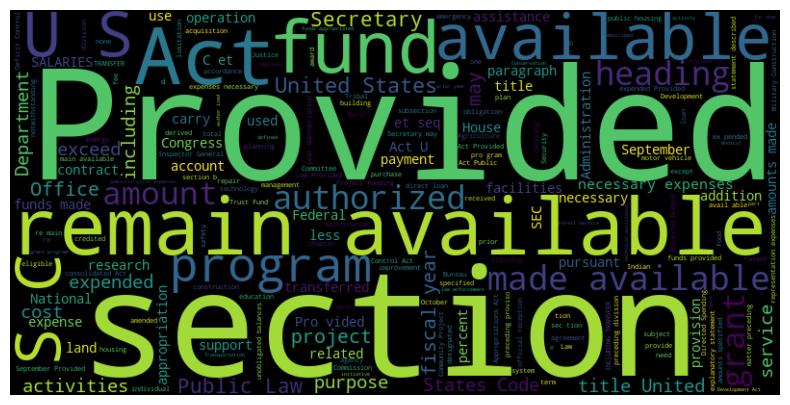

In [15]:
# Concatenate all text data into a single string
text = ' '.join(omni["Text"])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()